In [3]:
!pip3 install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.4 MB 483 kB/s eta 0:00:01
     |████████████████████████████████| 82 kB 628 kB/s  eta 0:00:01
     |████████████████████████████████| 298 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 660 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 226 kB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1435512 sha256=1793d8bc390669d53ff9de07dce6fc28fa51187b2c021edd1b0bf02b74244373
  Stored in directory: /home/newdrone18/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk


### 말뭉치¶

- 말뭉치(corpus)는 자연어 분석 작업을 위해 만든 샘플 문서 집합을 말한다. 단순히 소설, 신문 등의 문서를 모아놓은 것도 있지만 품사. 형태소, 등의 보조적 의미를 추가하고 쉬운 분석을 위해 구조적인 형태로 정리해 놓은 것을 포함한다. NLTK 패키지의 corpus 서브패키지에서는 다양한 연구용 말뭉치를 제공한다. 이 목록은 전체 corpus의 일부일 뿐이다. 말뭉치 자료는 설치시에 제공되지 않고 download 명령으로 사용자가 다운로드 받아야 한다. nltk.download("book") 명령을 실행하면 NLTK 패키지 사용자 설명서에서 요구하는 대부분의 말뭉치를 다운로드 받아준다.

- 말뭉치가 없을 때는 웹크롤링이나 샘플 말뭉치를 구하여 사용한다

In [4]:
%%time
import nltk
nltk.download('book')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/newdrone18/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_tree

CPU times: user 5.3 s, sys: 2.48 s, total: 7.77 s
Wall time: 3min 47s


[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection book
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/newdrone18/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /home/newdrone18/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/newdrone18/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 구텐베르그 말뭉치 목록
- 저작권이 말소된 책들을 모아 말뭉치를 만듬

In [5]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [8]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:702])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


### 토큰화
- 토큰화
    - 말뭉치를 토큰이라고 불리는 작은 단위로 나누는 행위
- 토큰
    - 문장, 단어, 형태소 등 분석에 있어서 의미를 가지는 단위
- 토큰의 명칭
    - 토큰의 이름은 실제 토큰의 활용과 관계가 없다.
    - 숫자 혹은 기호로 나타내거나
    - 품사 등을 덧붙여서 쓰는 경우도 있다

### 토큰의 종류
- 영어 : 의미가 같은 정규화된 단어

i am a boy => i + am + a + boy + .
- 한국어 : 의미가 같은 정규화된 형태소

나는 소년이다 => 나 + 는 + 소년 + 이다.

### 형태소
- 형태소
    - 의미를 가진 작은 말의 단위
- 한국어 형태소
    - 자립 형태소 : 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등
    - 의존 형태소 : 접사, 어미, 조사, 어간 등    

### 정규화
    - 의미와 쓰임이 같은 단어를 같은 토큰으로 표시(Normalization)
    - 다르면 다른 토큰으로 표시
    - 대소문자 통합(case removal)
    - 어간 추출(stemming)
    - 표제어 추출(lemmaization)
    - 품사 부착(part-of-speech tagging)(ex fly/n fly/v)
    - 불용어(stopwords)

### 어간추출(stemming)
    - 단어를 어간과 접사로 분리하여 단순히 접사를 삭제하거나 교체
        - 어간(stem) : 단어의 의미를 담고 있는 핵심 부분
        - 접사(affix) : 단어에 부가적인 의미를 주는 부분
    - 단순 알고리즘 사용
        - 포터 알고리즘
        - 랭케스터 알고리즘
        

### 표제어 추출
    - 표제어 추출(Lemmatization)
    - 기본 사전형 단어로 변형
    - am, was, been etc =? be
    - has, had => have
    - 사전 정보(WordNet) 사용

### 품사 부착
    - 품사(POS : part of speech)
        - 단어의 쓰임에 따른 구분
    - 동일한 철자의 단어가 다른 의미나 다른 품사로 쓰이는 경우
        - 다른 토큰으로 토큰화 해야 한다.
        

### 불용어(stop words)
    - 분석의 필요성이 없는 단어
    - 모든 문서에서 너무 자주 쓰이는 단어
    - 너무 드물게 나타나는 단어
    - EX) 조사

In [10]:
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [11]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

In [12]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly','flies','flying','flew','flown']

print("Porter Stemmer :",[st1.stem(w) for w in words])
print("Lancaster Stemmer:",[st2.stem(w) for w in words])

Porter Stemmer : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


In [14]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
# pos = optional argument
[lm.lemmatize(w,pos='v') for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [15]:
from nltk.tag import pos_tag

sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [16]:
def tokenizer(doc):
    return ['/'.join(p) for p in tagged_list]
tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [18]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Nltk 빈도 분석
- 두 가지 클래스 사용
    - Text 클래스
    - FreqDist 클래스

### Text Class
- 문서분석에 유용한 여러가지 함수를 제공한다.

    - plot : 단어 빈도 그래프
    - dispersion_plot : 단어 위치 그래프
    - concordance : 단어 문맥 인쇄
    - similar : 유사 단어 검색

In [28]:
from nltk import Text
import matplotlib.pyplot as plt

text = Text(word_tokenize(emma_raw))

#### 단어 빈도 그래프

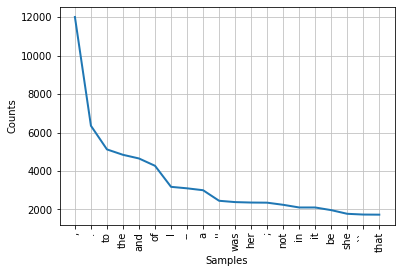

In [29]:
text.plot(20)
plt.show()

/home/newdrone18/.local/lib/python3.6/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded " "(please install Tkinter library).")


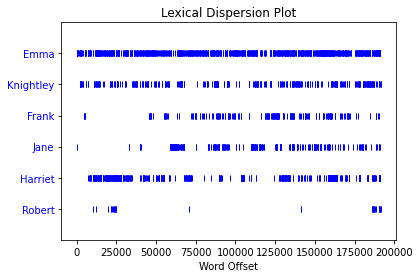

In [30]:
text.dispersion_plot(["Emma","Knightley","Frank","Jane","Harriet","Robert"])

#### 단어 문맥 인쇄
- concordance 매서드로 단어가 사용된 위치를 직접 표시하면 문맥이 어떤지 볼 수 있다. 여기서 문맥은 해당 단어의 앞과 뒤에 사용된 단어를 뜻한다

In [31]:
text.concordance("Emma")

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

 #### 유사 단어 검색
    - similar 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단언들을 찾는다.

In [32]:
text.similar("emma",1)

she


In [33]:
text.common_contexts(['Emma',"she"],1)

said_i


 ### FreqDist 클래스
    - FreqDist 클래스는 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스이다
    - Text 클래스의 vocab 메서드로 추출할 수 있다.
    - 토큰 리스트를 넣어서 직접 만들 수 도 있다.
    - 빈도 분석에 유용한 여러가지 메서드를 제공한다.
        - N : 빈도(횟수)
        - freq : 빈도(퍼센트)
        - most_common : 가장 많이 나오는 단어
        - plot : 가장 많이 나오는 단어 플롯

In [34]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

#### 토큰 리스트에서 생성
- 다음 코드에서는 엠마 말뭉치에서 사람의 이름(NNP)만 모아서 FreqDist 클래스 객체를 만들었다.
- 품사 태그에서 NNP 고유대명사이면서 필요없는 단어는 제거하였다.

In [35]:
from nltk import FreqDist
stopwords = ['Mr.','Mrs.','Miss','Mr','Mrs','Dear']
emma_tokens = pos_tag(word_tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [36]:
fd_names

FreqDist({'Emma': 829, 'Harriet': 477, 'Weston': 429, 'Elton': 374, 'Knightley': 373, 'Woodhouse': 307, 'Jane': 295, 'Fairfax': 232, 'Churchill': 213, 'Frank': 207, ...})

#### 단어 빈도 분석
- FreqDist 클래스는 단어를 키, 출현빈도를 값 으로 가지는 딕셔너리와 유사하다. 다음 코드는 전체 단어의 수 , "엠마" 라는 단어의 횟수, 확률을 각각 계산한다.

In [37]:
fd_names.N(), fd_names['Emma'], fd_names.freq('Emma')

(6924, 829, 0.11972848064702483)

- most_common  메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.

In [38]:
fd_names.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

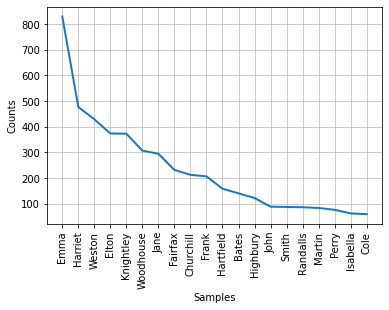

In [39]:
fd_names.plot(20)
plt.show()

## wordcloud

In [40]:
!pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 364 kB 59 kB/s eta 0:00:01


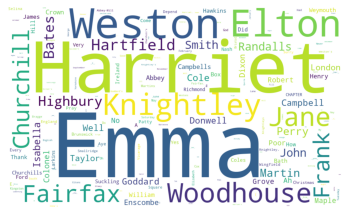

In [41]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()

 # 한글 자연어 처리

In [42]:
!pip3 install konlpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 19.4 MB 72 kB/s eta 0:00:014
     |████████████████████████████████| 86 kB 166 kB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 165 kB/s ta 0:00:012
     |████████████████████████████████| 5.5 MB 154 kB/s eta 0:00:01
     |████████████████████████████████| 147 kB 92 kB/s eta 0:00:01
